# fasion_MNIST的显示

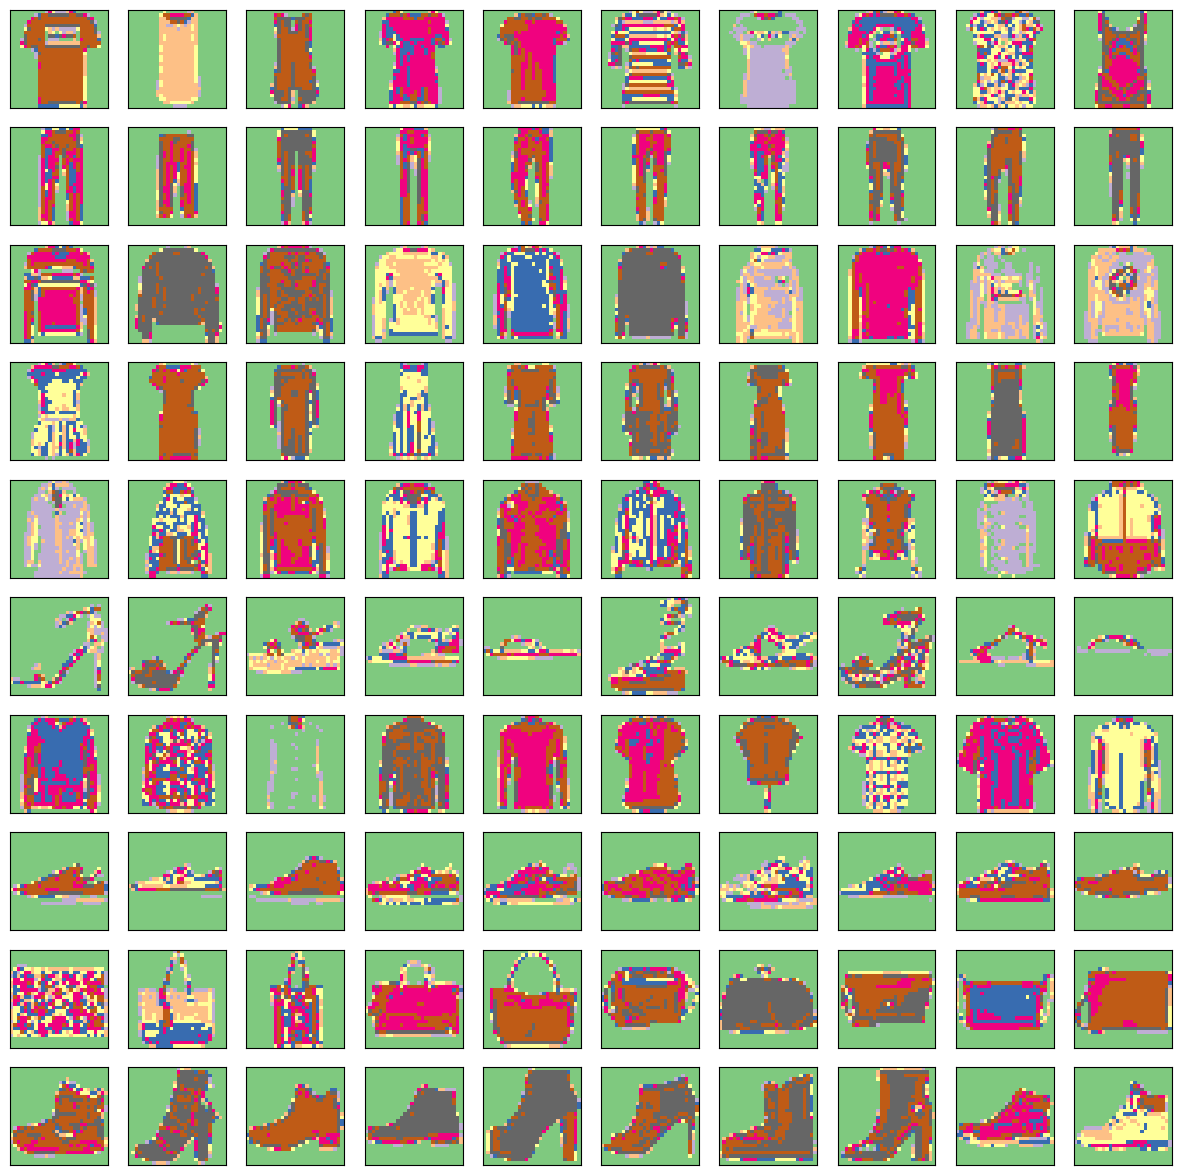

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from utils import mnist_reader

# 通过给定的git远程链接提供的函数导入dataset

X_train, y_train = mnist_reader.load_mnist('data\\fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data\\fashion', kind='t10k')
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

#看一眼数据长啥样
num_classes = 10
fig, axes = plt.subplots(num_classes, 10, figsize=(15, 15))
for i in range(num_classes):
    indices = np.where(y_train == i)[0]
    for j in range(10):
        axes[i][j].imshow(X_train[indices[j]].reshape(28, 28), cmap='Accent')
        axes[i][j].set_xticks([])
        axes[i][j].set_yticks([])
plt.show()

# 非简洁实现单个线性层的全连接网络

In [2]:
import numpy as np
from utils import mnist_reader
train_images, train_labels = mnist_reader.load_mnist('data\\fashion', kind='train')
test_images, test_labels = mnist_reader.load_mnist('data\\fashion', kind='t10k')

# 数据预处理
# 将像素值范围从0-255缩放到0-1之间
train_images = train_images / 255.0
test_images = test_images / 255.0


train_images = train_images.reshape(train_images.shape[0], -1)
test_images = test_images.reshape(test_images.shape[0], -1)


input_size = 784  # 输入大小，28x28图像展平为784维向量
num_classes = 10
learning_rate = 0.001
num_epochs = 5
batch_size = 64


np.random.seed(0)
weights = np.random.normal(5, 1.0, (input_size, num_classes))
bias = np.zeros((1, num_classes))


for epoch in range(num_epochs):
    for i in range(0, len(train_images), batch_size):
        batch_x = train_images[i:i + batch_size]
        batch_y = train_labels[i:i + batch_size]

        z = batch_x @ weights + bias
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        softmax_scores = exp_z / np.sum(exp_z, axis=1, keepdims=True)

        num_examples = len(batch_x)
        loss = -np.log(softmax_scores[range(num_examples), batch_y])
        loss = np.sum(loss) / num_examples

        # dscores: 这是一个包含每个样本对于每个类别的得分的矩阵。
        # 形状是(num_examples, num_classes)，其中num_examples是批次中的样本数量，num_classes是类别的数量。
        # 操作利用了广播的特性
        dscores = softmax_scores
        dscores[range(num_examples), batch_y] -= 1
        dscores /= num_examples

        dW = batch_x.T @ dscores
        db = np.sum(dscores, axis=0, keepdims=True)

        weights -= learning_rate * dW
        bias -= learning_rate * db

    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {loss:.4f}')


z = test_images @ weights + bias
exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
softmax_scores = exp_z / np.sum(exp_z, axis=1, keepdims=True)
predicted_labels = np.argmax(softmax_scores, axis=1)
acc = np.mean(predicted_labels == test_labels) * 100
print(f'Test Accuracy: {acc:.2f}%')

Epoch 1/5, Loss: 8.2256
Epoch 2/5, Loss: 6.1327
Epoch 3/5, Loss: 5.2962
Epoch 4/5, Loss: 4.8427
Epoch 5/5, Loss: 4.5497
Test Accuracy: 39.84%


# 多层感知机的简洁实现

## 数据集的导入

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from utils import mnist_reader
from torch.utils.data import DataLoader, TensorDataset

x_train, y_train = mnist_reader.load_mnist('data\\fashion', kind='train')
x_test, y_test = mnist_reader.load_mnist('data\\fashion', kind='t10k')

train_dataset = TensorDataset(torch.from_numpy(x_train).float(), torch.from_numpy(y_train).long())
test_dataset = TensorDataset(torch.from_numpy(x_test).float(), torch.from_numpy(y_test).long())

C:\Users\12521\AppData\Local\Temp\ipykernel_14416\1069234687.py:10: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ..\torch\csrc\utils\tensor_numpy.cpp:212.)
  train_dataset = TensorDataset(torch.from_numpy(x_train).float(), torch.from_numpy(y_train).long())


## 搭建多层感知机框架

In [4]:
class Classifier(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, 64)
        self.fc4 = nn.Linear(64, 128)
        self.fc5 = nn.Linear(128, 64)
        self.fc6 = nn.Linear(64, 32)
        self.fc7 = nn.Linear(32, 32)
        self.fc8 = nn.Linear(32, 32)
        self.fc9 = nn.Linear(32, 32)
        self.fc10 = nn.Linear(32, num_classes)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        x = torch.relu(self.fc6(x))
        x = torch.relu(self.fc7(x))
        x = torch.relu(self.fc8(x))
        x = torch.relu(self.fc9(x))

        x = self.fc10(x)
        return x

## test&train mode

In [5]:
def test1(model, test_loader, criterion):
    model.eval()  # 设置模型为评估模式
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in test_loader:
        outputs = model(inputs).detach()
        loss = criterion(outputs, labels)
        running_loss += loss.item()

        _, predicted = torch.max(outputs, dim=1)
        correct += (predicted == labels).sum().item()
        total += len(labels)

    average_loss = running_loss / len(test_loader)
    accuracy = 100 * correct / total
    print(f'Test Loss: {average_loss:.4f}, Accuracy: {accuracy:.2f}%')


def train(model, train_loader, test_loader, criterion, optimizer, num_epochs):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()


            running_loss += loss.item()
            _, predicted = torch.max(outputs, dim=1)
            correct += (predicted == labels).sum().item()
            total += len(labels)

        accuracy = 100 * correct / total
        average_loss = running_loss / len(train_loader)
        print(f'Epoch [{epoch+1}/{num_epochs}], TrainLoss: {average_loss:.4f}, TrainAccuracy: {accuracy:.2f}%')
        test1(model, test_loader, criterion)

## 实例化

In [17]:
input_size = 784
num_classes = 10
num_epochs = 7
learning_rate = 0.001
batch_size = 64


model = Classifier(input_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

train(model, train_loader, test_loader, criterion, optimizer, num_epochs)

Epoch [1/8], TrainLoss: 0.9136, TrainAccuracy: 61.68%
Test Loss: 0.6475, Accuracy: 77.66%
Epoch [2/8], TrainLoss: 0.6099, TrainAccuracy: 76.85%
Test Loss: 0.6130, Accuracy: 78.41%
Epoch [3/8], TrainLoss: 0.5038, TrainAccuracy: 81.94%
Test Loss: 0.5331, Accuracy: 81.85%
Epoch [4/8], TrainLoss: 0.4929, TrainAccuracy: 83.08%
Test Loss: 0.7585, Accuracy: 72.90%
Epoch [5/8], TrainLoss: 0.5466, TrainAccuracy: 81.17%
Test Loss: 0.4990, Accuracy: 83.27%
Epoch [6/8], TrainLoss: 0.4563, TrainAccuracy: 84.38%
Test Loss: 0.4715, Accuracy: 83.63%
Epoch [7/8], TrainLoss: 0.4388, TrainAccuracy: 84.78%
Test Loss: 0.4771, Accuracy: 83.44%
Epoch [8/8], TrainLoss: 0.4156, TrainAccuracy: 85.71%
Test Loss: 0.4702, Accuracy: 83.43%


# experiments&answers

## Q_a
在Day3的实验中，感知机的层数及每层的维度并不是越大越好，层数及维度过高会导致过拟合。
可设计实验：改变多层感知机框架，设置层数为16层，参数设为128，判断感知机层数和每层维度过多的影响

In [14]:
class Classifier(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 128)
        self.fc4 = nn.Linear(128, 128)
        self.fc5 = nn.Linear(128, 128)
        self.fc6 = nn.Linear(128, 128)
        self.fc7 = nn.Linear(128, 128)
        self.fc8 = nn.Linear(128, 128)
        self.fc9 = nn.Linear(128, 128)
        self.fc10 = nn.Linear(128, 128)
        self.fc11 = nn.Linear(128, 128)
        self.fc12 = nn.Linear(128, 128)
        self.fc13 = nn.Linear(128, 128)
        self.fc14 = nn.Linear(128, 128)
        self.fc15 = nn.Linear(128, 128)
        self.fc16 = nn.Linear(128, num_classes)


    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        x = torch.relu(self.fc6(x))
        x = torch.relu(self.fc7(x))
        x = torch.relu(self.fc8(x))
        x = torch.relu(self.fc9(x))
        x = torch.relu(self.fc10(x))
        x = torch.relu(self.fc11(x))
        x = torch.relu(self.fc12(x))
        x = torch.relu(self.fc13(x))
        x = torch.relu(self.fc14(x))
        x = torch.relu(self.fc15(x))

        x = self.fc16(x)
        return x

train(model, train_loader, test_loader, criterion, optimizer, num_epochs)


Epoch [1/8], TrainLoss: 0.2532, TrainAccuracy: 90.64%
Test Loss: 0.3698, Accuracy: 87.40%
Epoch [2/8], TrainLoss: 0.2492, TrainAccuracy: 90.85%
Test Loss: 0.3665, Accuracy: 87.42%
Epoch [3/8], TrainLoss: 0.2479, TrainAccuracy: 90.94%
Test Loss: 0.3706, Accuracy: 87.83%
Epoch [4/8], TrainLoss: 0.2500, TrainAccuracy: 90.91%
Test Loss: 0.3734, Accuracy: 87.66%
Epoch [5/8], TrainLoss: 0.2463, TrainAccuracy: 91.01%
Test Loss: 0.3927, Accuracy: 86.89%
Epoch [6/8], TrainLoss: 0.2475, TrainAccuracy: 90.88%
Test Loss: 0.3916, Accuracy: 87.62%
Epoch [7/8], TrainLoss: 0.2433, TrainAccuracy: 91.05%
Test Loss: 0.3762, Accuracy: 87.34%
Epoch [8/8], TrainLoss: 0.2430, TrainAccuracy: 91.10%
Test Loss: 0.3580, Accuracy: 88.20%


由实验结果可见，出现了过拟合的现象，即test accuracy 低于train accuracy，因此并不是每层维度越多，层数越多越好

## Q_b
由结果可知，当epoch == 7后，test accuracy 几乎不变，因此，设置训练轮数为7比较合适

## Q_d
尝试激活函数sigmoid,观察其影响

In [19]:
class Classifier(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, 32)
        self.fc4 = nn.Linear(32, 32)
        self.fc5 = nn.Linear(32, 32)
        self.fc6 = nn.Linear(32, 32)
        self.fc7 = nn.Linear(32, 32)
        self.fc8 = nn.Linear(32, 32)
        self.fc9 = nn.Linear(32, 32)
        self.fc10 = nn.Linear(32, num_classes)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        x = torch.relu(self.fc6(x))
        x = torch.relu(self.fc7(x))
        x = torch.relu(self.fc8(x))
        x = torch.nn.Sigmoid(self.fc9(x))

        x = self.fc10(x)
        return x
train(model, train_loader, test_loader, criterion, optimizer, num_epochs)

Epoch [1/8], TrainLoss: 0.3645, TrainAccuracy: 87.40%
Test Loss: 0.4210, Accuracy: 85.72%
Epoch [2/8], TrainLoss: 0.3512, TrainAccuracy: 87.79%
Test Loss: 0.4156, Accuracy: 85.57%
Epoch [3/8], TrainLoss: 0.3546, TrainAccuracy: 87.85%
Test Loss: 0.3996, Accuracy: 86.37%
Epoch [4/8], TrainLoss: 0.3522, TrainAccuracy: 87.76%
Test Loss: 0.3995, Accuracy: 86.67%
Epoch [5/8], TrainLoss: 0.3669, TrainAccuracy: 87.22%
Test Loss: 0.4150, Accuracy: 85.63%
Epoch [6/8], TrainLoss: 0.3345, TrainAccuracy: 88.38%
Test Loss: 0.4111, Accuracy: 85.82%
Epoch [7/8], TrainLoss: 0.3292, TrainAccuracy: 88.52%
Test Loss: 0.4232, Accuracy: 85.65%
Epoch [8/8], TrainLoss: 0.3396, TrainAccuracy: 88.11%
Test Loss: 0.4017, Accuracy: 86.49%


## Q_e
在完成day_4任务时，使用的便是minibatch的做法了。而batch太小，训练过程不稳定；batch过大，则和gd一样，训练速度过慢。